## Gym Members Exercise Tracking – Data Analysis

Overview

In this project, I will analyze a dataset related to gym members and their workout behaviors. The goal is to explore general patterns such as age distribution, exercise preferences, workout duration, and training frequency.

Important Note About the Data

This dataset is fully synthetic and does not reflect real-world individuals or real gym activity.
It was generated solely for demonstration and educational purposes. Any insights or patterns found should be interpreted as examples only.

In [1]:
import pandas as pd

df = pd.read_csv("data/gym_members_exercise_tracking_synthetic_data.csv")
df.head()


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,34.0,Female,86.7,1.86,174,152.0,74.0,1.12,712.0,Strength,12.8,2.4,5.0,2.0,14.31
1,26.0,Female,84.7,1.83,166,156.0,73.0,1.00,833.0,Strength,27.9,2.8,5.0,2.0,33.49
2,22.0,Male,64.8,1.85,187,166.0,64.0,1.24,1678.0,Cardio,28.7,1.9,3.0,2.0,12.73
3,54.0,Female,75.3,1.82,187,169.0,58.0,1.45,628.0,Cardio,31.8,2.4,4.0,1.0,20.37
4,34.0,Female,52.8,1.74,177,169.0,66.0,1.60,1286.0,Strength,26.4,3.2,4.0,2.0,20.83


### Data Cleaning

**Handle Missing Values**
- Remove missing rows
- Or fill missing values

**Fix Data Types**
- Convert columns to numeric, datetime, etc.


In [2]:
print("Missing values per column:")
print(df.isnull().sum())

print("\nNumber of duplicate rows:")
print(df.duplicated().sum())
df.describe()


Missing values per column:
Age                              10
Gender                           71
Weight (kg)                      22
Height (m)                       26
Max_BPM                          21
Avg_BPM                          30
Resting_BPM                      19
Session_Duration (hours)         23
Calories_Burned                  23
Workout_Type                     61
Fat_Percentage                   16
Water_Intake (liters)            24
Workout_Frequency (days/week)    58
Experience_Level                 57
BMI                              30
dtype: int64

Number of duplicate rows:
0


,Age,Weight (kg),Height (m),Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,1790.000000,1778.000000,1774.000000,1770.000000,1781.000000,1777.000000,1777.000000,1784.000000,1776.000000,1742.000000,1743.000000,1770.000000
mean,34.475419,67.606637,1.739233,146.259322,63.951151,1.391598,1033.698931,23.509361,2.706644,3.339265,1.823867,19.957774
std,12.315728,19.861408,0.123892,15.219516,7.936502,0.372342,328.049662,5.865557,0.710224,0.947955,0.746568,6.573175
min,18.000000,40.000000,1.500000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,23.000000,52.300000,1.650000,133.250000,57.000000,1.130000,794.000000,20.500000,2.100000,3.000000,1.000000,14.780000
50%,33.000000,65.300000,1.730000,146.000000,65.000000,1.370000,1030.000000,24.300000,2.800000,3.000000,2.000000,18.690000
75%,45.000000,80.100000,1.820000,160.000000,72.000000,1.640000,1249.000000,27.500000,3.400000,4.000000,2.000000,23.517500
max,59.000000,129.900000,2.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [3]:
#calorie per hour
df["Calories_Per_Hour"] = df["Calories_Burned"] / df["Session_Duration (hours)"]
#frop bad BMI clomun
df = df.drop(columns=["BMI"])
# Recalculate BMI correctly
df["BMI_Recalculated"] = df["Weight (kg)"] / (df["Height (m)"] ** 2)

# Create BMI categories
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obesity"

df["BMI_Category"] = df["BMI_Recalculated"].apply(bmi_category)


In [4]:
df = df.dropna()
df.describe()

,Age,Weight (kg),Height (m),Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,Calories_Per_Hour,BMI_Recalculated
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000
mean,34.514079,67.655090,1.738686,146.122744,63.851264,1.391617,1036.118412,23.458773,2.728736,3.352347,1.827437,810.347599,22.777783
std,12.281324,19.844107,0.123811,15.355873,7.888006,0.372581,323.290871,5.877735,0.710011,0.953414,0.741891,378.797652,7.676200
min,18.000000,40.000000,1.500000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,172.527473,10.000000
25%,24.000000,52.600000,1.650000,133.000000,57.000000,1.140000,803.000000,20.400000,2.100000,3.000000,1.000000,545.637584,16.989619
50%,33.000000,65.200000,1.730000,145.000000,65.000000,1.370000,1034.000000,24.100000,2.800000,3.000000,2.000000,736.000000,21.565755
75%,45.000000,80.500000,1.820000,160.000000,71.000000,1.630000,1249.000000,27.400000,3.400000,4.000000,2.000000,983.464567,27.319211
max,59.000000,129.900000,2.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,3566.000000,53.377712


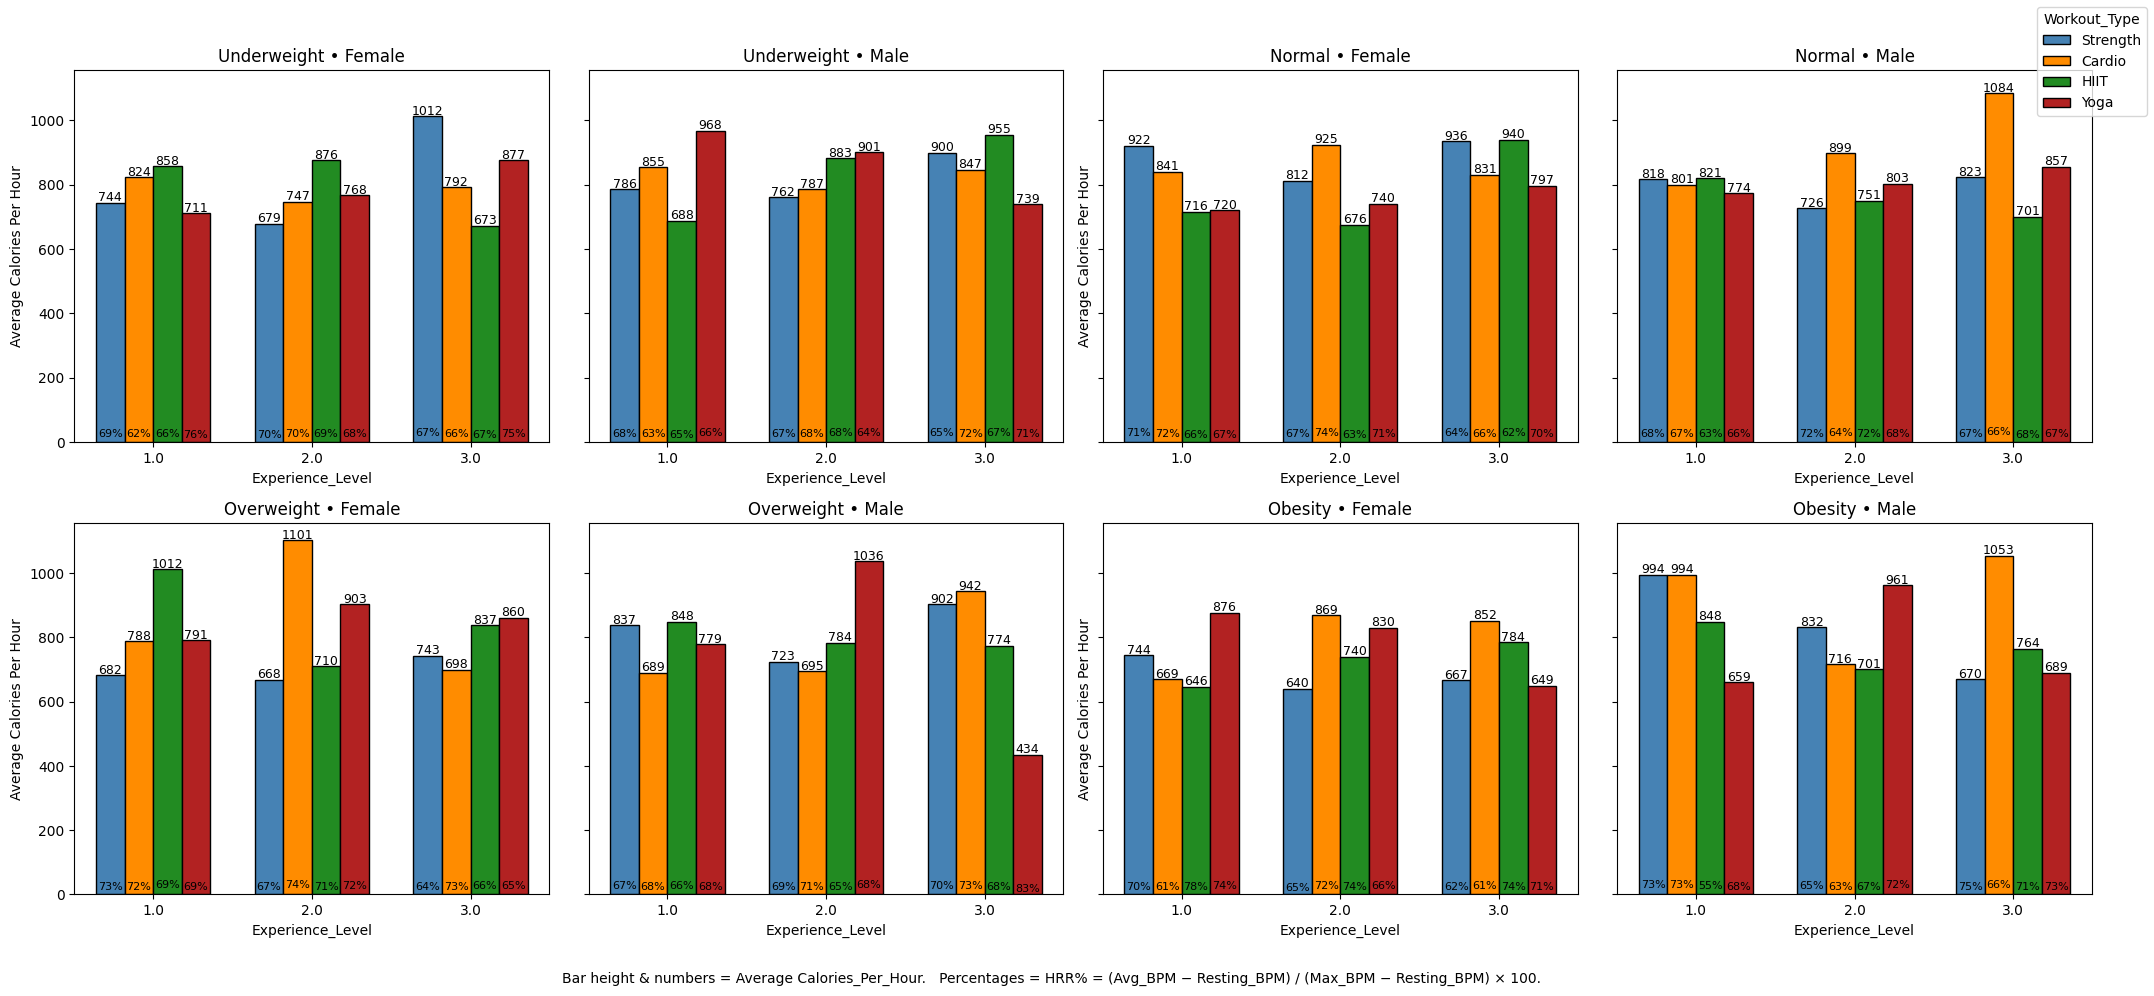

: 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------- Recalculate BMI & Create Categories ----------
df["BMI_Recalculated"] = df["Weight (kg)"] / (df["Height (m)"] ** 2)

def bmi_category(bmi):
    if bmi < 18.5: return "Underweight"
    if bmi < 25:   return "Normal"
    if bmi < 30:   return "Overweight"
    return "Obesity"

df["BMI_Category"] = df["BMI_Recalculated"].apply(bmi_category)

# ---------- HRR% ----------
df["Max_BPM"] = 220 - df["Age"]
df["HRR_percent"] = ((df["Avg_BPM"] - df["Resting_BPM"]) /
                     (df["Max_BPM"] - df["Resting_BPM"])) * 100

# ---------- Calories Per Hour ----------
df["Calories_Per_Hour"] = df["Calories_Burned"] / df["Session_Duration (hours)"]

# optional safety cleanup
df["Calories_Per_Hour"] = df["Calories_Per_Hour"].replace([np.inf, -np.inf], np.nan).fillna(0)

# ---------- Aggregation ----------
agg = (
    df.groupby(["BMI_Category", "Gender", "Experience_Level", "Workout_Type"])
      .agg(Calories_mean=("Calories_Per_Hour", "mean"),
           HRR=("HRR_percent", "mean"))
      .reset_index()
)

# ---------- Plotting ----------
bmi_order   = ["Underweight", "Normal", "Overweight", "Obesity"]
gender_order = ["Female", "Male"]
workouts    = ["Strength", "Cardio", "HIIT", "Yoga"]
exp_levels  = sorted(df["Experience_Level"].unique())

fig, axes = plt.subplots(2, 4, figsize=(22, 10), sharey=True)
axes = axes.flatten()

colors = ["steelblue", "darkorange", "forestgreen", "firebrick"]
bar_width = 0.18

for i_bmi, bmi in enumerate(bmi_order):
    for i_gen, gender in enumerate(gender_order):

        ax = axes[i_bmi * 2 + i_gen]
        sub = agg[(agg["BMI_Category"] == bmi) & (agg["Gender"] == gender)]

        x_groups = np.arange(len(exp_levels))

        for wi, w in enumerate(workouts):

            s = (
                sub[sub["Workout_Type"] == w]
                .set_index("Experience_Level")
                .reindex(exp_levels)
            )

            y = s["Calories_mean"].values
            p = s["HRR"].values

            x = x_groups + (wi - 1.5) * bar_width

            ax.bar(x, y, width=bar_width, color=colors[wi], edgecolor="black",
                   label=w if (i_bmi==0 and i_gen==0) else None)

            # Average calories per hour above bars
            for xi, yi in zip(x, y):
                if not np.isnan(yi):
                    ax.text(xi, yi + 5, f"{int(round(yi))}", ha="center", fontsize=9)

            # HRR% below bars
            for xi, yi, pi in zip(x, y, p):
                if not np.isnan(yi) and not np.isnan(pi):
                    ax.text(xi, yi * 0.02, f"{int(round(pi))}%", ha="center", fontsize=8)

        ax.set_title(f"{bmi} • {gender}")
        ax.set_xticks(x_groups)
        ax.set_xticklabels([str(e) for e in exp_levels])
        ax.set_xlabel("Experience_Level")

        if i_gen == 0:
            ax.set_ylabel("Average Calories Per Hour")

# Legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Workout_Type", loc="upper right")

# Caption (updated)
fig.text(0.5, 0.02,
         "Bar height & numbers = Average Calories_Per_Hour.   Percentages = HRR% = (Avg_BPM − Resting_BPM) / (Max_BPM − Resting_BPM) × 100.",
         ha="center")

plt.tight_layout(rect=[0.02, 0.05, 0.98, 0.97])
plt.show()


## Note on Data Accuracy

This graph is based on synthetic data, so the calorie burn and HRR values do not reflect real-world physiology. The numbers were randomly generated and don’t follow how the human body actually works.
Therefore, the chart is useful only to demonstrate data analysis and visualization, not for making real fitness conclusions.

50–60% HRR → light effort

60–70% HRR → moderate effort

70–80% HRR → vigorous effort

80%+ HRR → very intense
